# Plot how this delay time evolves across the day for the five most used stations in Belgium.

In [2]:
import src.data_processing.data as data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 5000)


Check the top 5 stations w.r.t. travelers

In [3]:
stations = data.stations
travelers = data.travelers
trips = data.full_trips
travelers.sort_values(by = "sum", ascending = False).head(5)

,Unnamed: 0,Station,week,saturday,sunday,sum
88,88,brussel-noord/bruxelles-nord,63779.0,25820.0,21621.0,111220.0
87,87,brussel-zuid/bruxelles-midi,59670.0,23733.0,24534.0,107937.0
83,83,brussel-centraal/bruxelles-central,60706.0,23336.0,22027.0,106069.0
197,197,gent-sint-pieters,55325.0,25486.0,20416.0,101227.0
16,16,antwerpen-centraal,39628.0,23918.0,18553.0,82099.0


Check the top 5 stations w.r.t. number of trains going to these stations

In [4]:
pd_df = pd.DataFrame(trips["Name of the stop"].value_counts()).reset_index()
pd_df.columns = ["Name of the stop", "count"]
pd_df.head(5)

,Name of the stop,count
0,brussel-zuid/bruxelles-midi,7421
1,brussel-noord/bruxelles-nord,6899
2,brussel-centraal/bruxelles-central,6892
3,brussel-kapellekerk/bruxelles-chapelle,6892
4,brussel-congres/bruxelles-congrès,6892


We assume that the most used stops are the ones that have the most amount of travelers.

In [5]:
trips.sort_values(by ="Time of real arrival", ascending=False)
# They all arrive at "31-10" but this is wrong, we only need to look at the time part of this value.
trips["Time of real arrival"].dt.time

0        06:31:22
1        06:36:23
2        06:37:44
3        06:38:39
4        06:39:47
           ...   
72524    17:20:23
72525    17:27:14
72526    17:33:22
72527    18:57:01
72528    19:29:57
Name: Time of real arrival, Length: 440943, dtype: object

In [6]:
trips = trips.merge(travelers[["Station", "sum"]], left_on=["Name of the stop"], right_on=["Station"], how="left")
trips = trips[(trips["Name of the stop"] == "brussel-noord/bruxelles-nord") | (trips["Name of the stop"] == "brussel-zuid/bruxelles-midi") | (trips["Name of the stop"] == "brussel-centraal/bruxelles-central") | (trips["Name of the stop"] == "gent-sint-pieters") | (trips["Name of the stop"] == "antwerpen-centraal")]

trips = trips.sort_values(by = ["Station", "Time of real departure"])
trips

,Unnamed: 0,Date of departure,Train number,Relation,Railway operators,Railway of departure,Time of real arrival,Time of real departure,Time of planned arrival,Time of planned departure,Direction of relation,Name of the stop,Railway of arrival,Date of planned arrival,Date of planned departure,Date of real arrival,Date of real departure,Delay time,Station,sum
149951,5527,2020-09-20,1995,L B1-2,SNCB/NMBS,27,NaT,2022-10-31 00:05:41,NaT,2022-10-31 00:05:00,L B1-2: BRUSSEL-NOORD -> NIVELLES,antwerpen-centraal,NaN,NaN,2020-09-20,NaN,2020-09-20,0,antwerpen-centraal,82099.0
411610,43196,2020-09-24,1996,L B1-2,SNCB/NMBS,27,NaT,2022-10-31 00:10:29,NaT,2022-10-31 00:10:00,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,antwerpen-centraal,NaN,NaN,2020-09-24,NaN,2020-09-24,0,antwerpen-centraal,82099.0
55489,55489,2020-09-22,1996,L B1-2,SNCB/NMBS,25,NaT,2022-10-31 00:10:37,NaT,2022-10-31 00:10:00,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,antwerpen-centraal,NaN,NaN,2020-09-22,NaN,2020-09-22,0,antwerpen-centraal,82099.0
279062,22896,2020-09-26,1996,L B1-2,SNCB/NMBS,27,NaT,2022-10-31 00:10:48,NaT,2022-10-31 00:10:00,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,antwerpen-centraal,NaN,NaN,2020-09-26,NaN,2020-09-26,0,antwerpen-centraal,82099.0
336799,40896,2020-09-25,1996,L B1-2,SNCB/NMBS,27,NaT,2022-10-31 00:10:58,NaT,2022-10-31 00:10:00,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,antwerpen-centraal,NaN,NaN,2020-09-25,NaN,2020-09-25,0,antwerpen-centraal,82099.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436337,67923,2020-09-24,7084,P,SNCB/NMBS,NaN,2022-10-31 07:27:17,NaT,2022-10-31 07:24:00,NaT,NaN,gent-sint-pieters,50E,2020-09-24 00:00:00,NaN,2020-09-24,NaN,197,gent-sint-pieters,101227.0
437294,68880,2020-09-24,680,L G3,SNCB/NMBS,NaN,2022-10-31 10:15:09,NaT,2022-10-31 10:14:00,NaT,L G3: LOKEREN -> GENT-SINT-PIETERS,gent-sint-pieters,50E,2020-09-24 00:00:00,NaN,2020-09-24,NaN,69,gent-sint-pieters,101227.0
437657,69243,2020-09-24,679,L G3,SNCB/NMBS,NaN,2022-10-31 09:26:24,NaT,2022-10-31 09:14:00,NaT,L G3: LOKEREN -> GENT-SINT-PIETERS,gent-sint-pieters,50E,2020-09-24 00:00:00,NaN,2020-09-24,NaN,744,gent-sint-pieters,101227.0
437796,69382,2020-09-24,7963,P,SNCB/NMBS,NaN,2022-10-31 08:36:18,NaT,2022-10-31 08:35:00,NaT,NaN,gent-sint-pieters,75,2020-09-24 00:00:00,NaN,2020-09-24,NaN,78,gent-sint-pieters,101227.0


Some delay times are impossible, also see Q11 , so we delete the delete these.

In [7]:
for x in trips[['Delay time']]:
    trips.loc[trips[x] > 85000,x] = np.nan
trips.sort_values(by = "Delay time", ascending = False)

,Unnamed: 0,Date of departure,Train number,Relation,Railway operators,Railway of departure,Time of real arrival,Time of real departure,Time of planned arrival,Time of planned departure,Direction of relation,Name of the stop,Railway of arrival,Date of planned arrival,Date of planned departure,Date of real arrival,Date of real departure,Delay time,Station,sum
185501,1386,2020-09-21,324,INT,SNCB/NMBS,NaN,2022-10-31 16:16:30,NaT,2022-10-31 10:55:00,NaT,INT: WIEN HBF -> BRUSSEL-ZUID,brussel-zuid/bruxelles-midi,0/2,2020-09-21 00:00:00,NaN,2020-09-21,NaN,19290.0,brussel-zuid/bruxelles-midi,107937.0
245254,61139,2020-09-21,324,INT,SNCB/NMBS,0/2,2022-10-31 16:10:48,2022-10-31 16:10:48,2022-10-31 10:51:00,2022-10-31 10:51:00,INT: WIEN HBF -> BRUSSEL-ZUID,brussel-centraal/bruxelles-central,0/2,2020-09-21 00:00:00,2020-09-21,2020-09-21,2020-09-21,19188.0,brussel-centraal/bruxelles-central,106069.0
185495,1380,2020-09-21,324,INT,SNCB/NMBS,0/2,2022-10-31 16:03:18,2022-10-31 16:05:57,2022-10-31 10:45:00,2022-10-31 10:47:00,INT: WIEN HBF -> BRUSSEL-ZUID,brussel-noord/bruxelles-nord,36,2020-09-21 00:00:00,2020-09-21,2020-09-21,2020-09-21,19098.0,brussel-noord/bruxelles-nord,111220.0
217757,33642,2020-09-21,405,IC 12,SNCB/NMBS,NaN,2022-10-31 08:57:32,NaT,2022-10-31 06:23:00,NaT,IC 12: KORTRIJK -> WELKENRAEDT,brussel-zuid/bruxelles-midi,50A,2020-09-21 00:00:00,NaN,2020-09-21,NaN,9272.0,brussel-zuid/bruxelles-midi,107937.0
248868,64753,2020-09-21,405,IC 12,SNCB/NMBS,50A,2022-10-31 08:25:07,2022-10-31 08:27:34,2022-10-31 05:51:00,2022-10-31 05:54:00,IC 12: KORTRIJK -> WELKENRAEDT,gent-sint-pieters,75,2020-09-21 00:00:00,2020-09-21,2020-09-21,2020-09-21,9247.0,gent-sint-pieters,101227.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333779,37876,2020-09-25,12159,EXTRA,SNCB/NMBS,28(1),NaT,2022-10-31 09:34:51,NaT,2022-10-31 09:34:00,NaN,brussel-zuid/bruxelles-midi,NaN,NaN,2020-09-25,NaN,2020-09-25,0.0,brussel-zuid/bruxelles-midi,107937.0
49222,49222,2020-09-22,12159,EXTRA,SNCB/NMBS,28(1),NaT,2022-10-31 09:34:55,NaT,2022-10-31 09:34:00,NaN,brussel-zuid/bruxelles-midi,NaN,NaN,2020-09-22,NaN,2020-09-22,0.0,brussel-zuid/bruxelles-midi,107937.0
149951,5527,2020-09-20,1995,L B1-2,SNCB/NMBS,27,NaT,2022-10-31 00:05:41,NaT,2022-10-31 00:05:00,L B1-2: BRUSSEL-NOORD -> NIVELLES,antwerpen-centraal,NaN,NaN,2020-09-20,NaN,2020-09-20,0.0,antwerpen-centraal,82099.0
152523,8099,2020-09-20,1922,IC 06-1,SNCB/NMBS,36,2022-10-31 23:59:11,2022-10-31 00:04:00,2022-10-31 00:00:00,2022-10-31 00:04:00,IC 06-1: TOURNAI -> BRUSSELS AIRPORT - ZAVENTEM,brussel-noord/bruxelles-nord,0/3,2020-09-21 00:00:00,2020-09-21,2020-09-20,2020-09-21,NaN,brussel-noord/bruxelles-nord,111220.0


In [8]:
# for station in trips["Name of the stop"].unique():
#     station_trips = trips[trips["Name of the stop"] == station]
#     station_trips = station_trips.sort_values(by = ["Time of real departure"])
#     station_trips.plot(x = "Time of real departure", y = "Delay time", title = station)
#     plt.show()

In [9]:
# def plot_delay(trips, station):
#     station_trips = trips[trips["Name of the stop"] == station]
#     station_trips = station_trips[(station_trips["Time of real departure"].dt.day == 31) & (station_trips["Time of real departure"].dt.month == 10) & (station_trips["Time of real departure"].dt.year == 2022)]
#     station_trips = station_trips.sort_values(by = ["Time of real departure"])
#     station_trips.plot(x = "Time of real departure", y = "Delay time", title = station)
#
#     # trips = trips[(trips["Name of the stop"] == station)]
#     # trips = trips[(trips["Time of real departure"].dt.day == 31) & (trips["Time of real departure"].dt.month == 10) & (trips["Time of real departure"].dt.year == 2022)]
#     # trips = trips.sort_values(by = ["Time of real departure"])
#     #
#     # trips["Time of real departure"] = trips["Time of real departure"].dt.hour
#     # # trips.plot(x="Time of real departure", y="Delay time", kind="scatter", title=station)
#     # trips.plot(x="Time of real departure", y="Delay time", kind="bar", figsize=(20,10), title="Delay time in function of the time of real departure for station " + station)
#
# plot_delay(trips, "antwerpen-centraal")

We see that that most delay occurs at the peak hours: when people go to work / home: around 6-9 am and 16-19pm

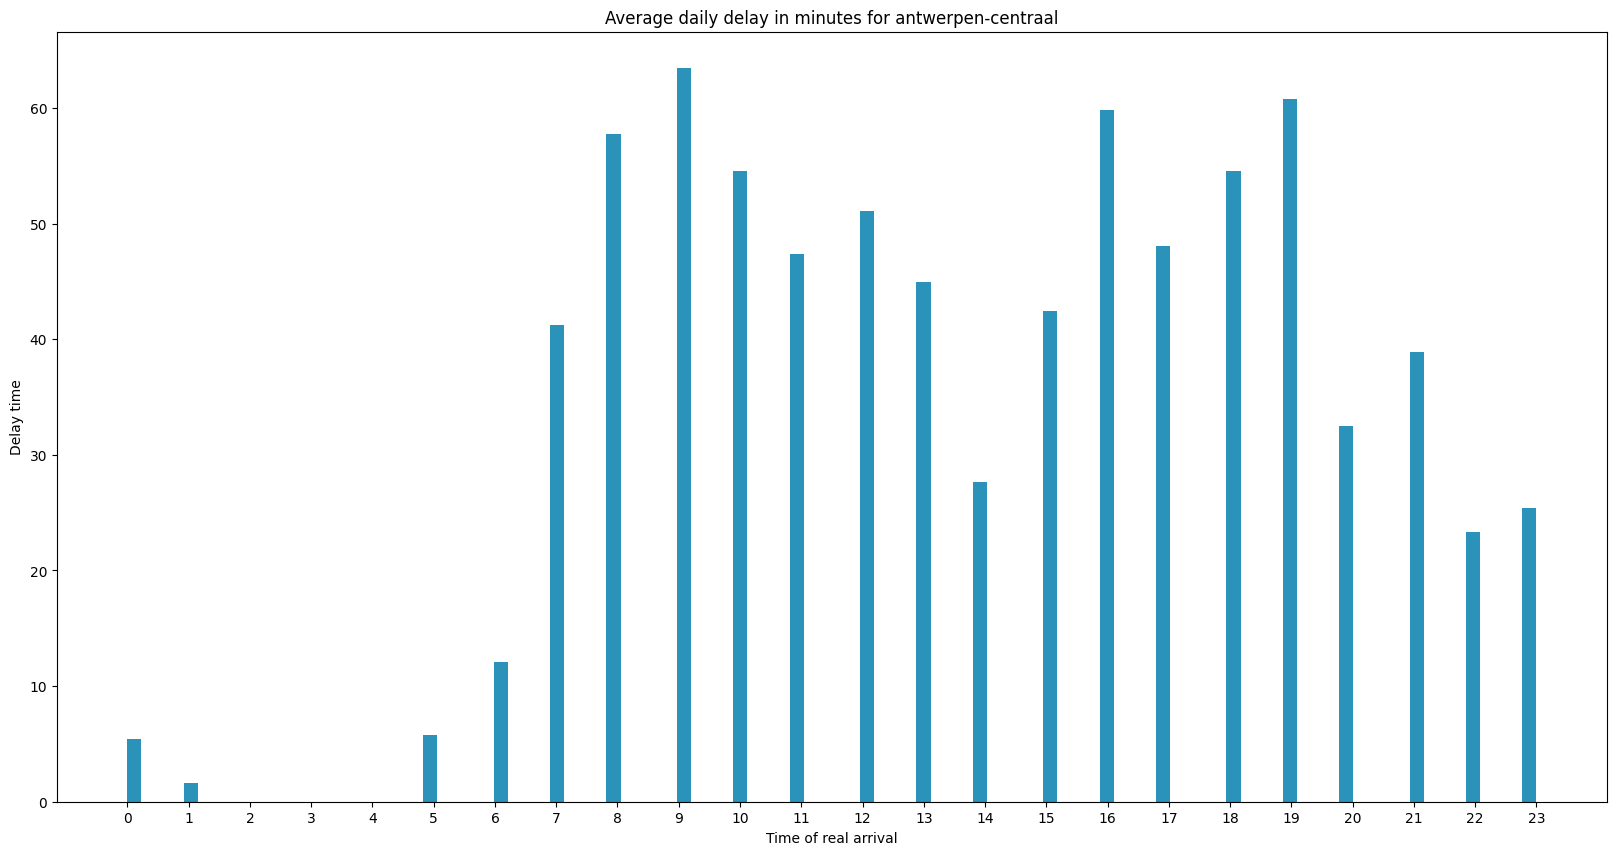

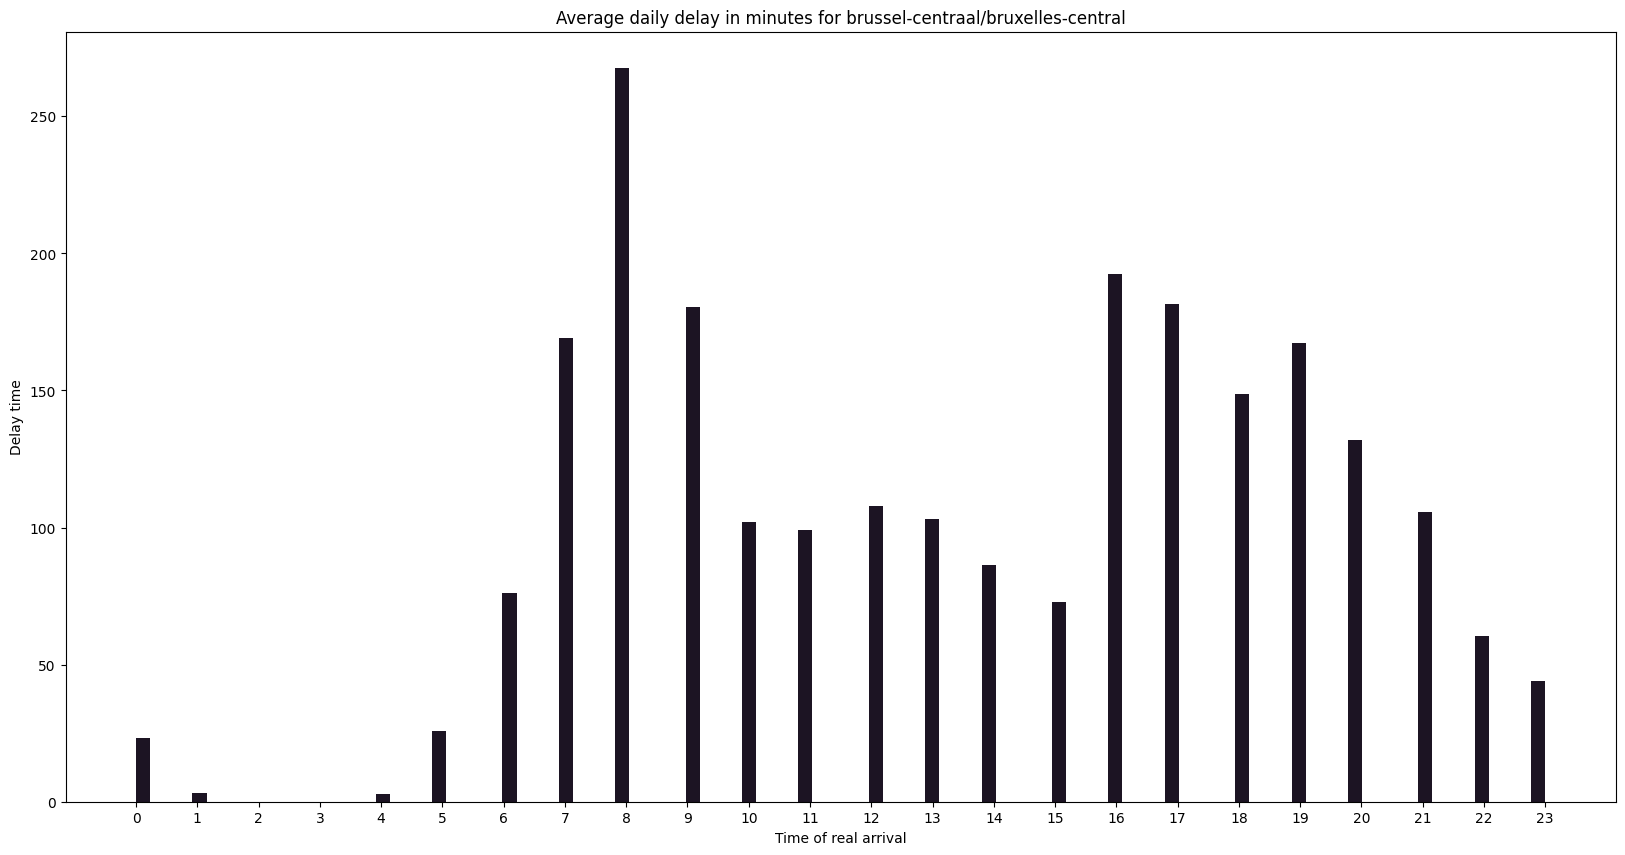

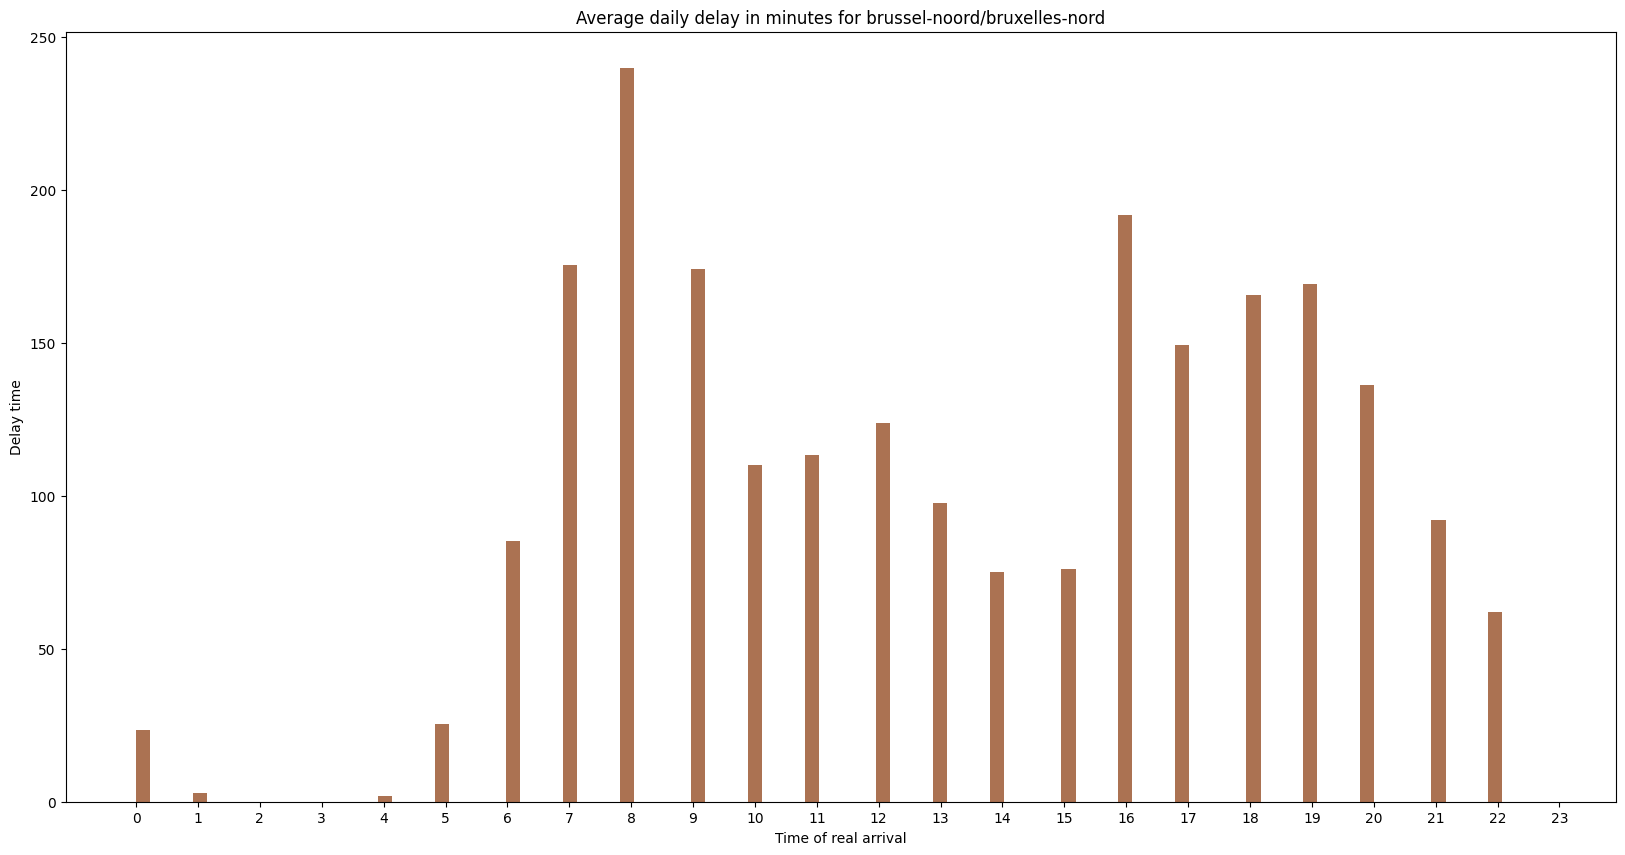

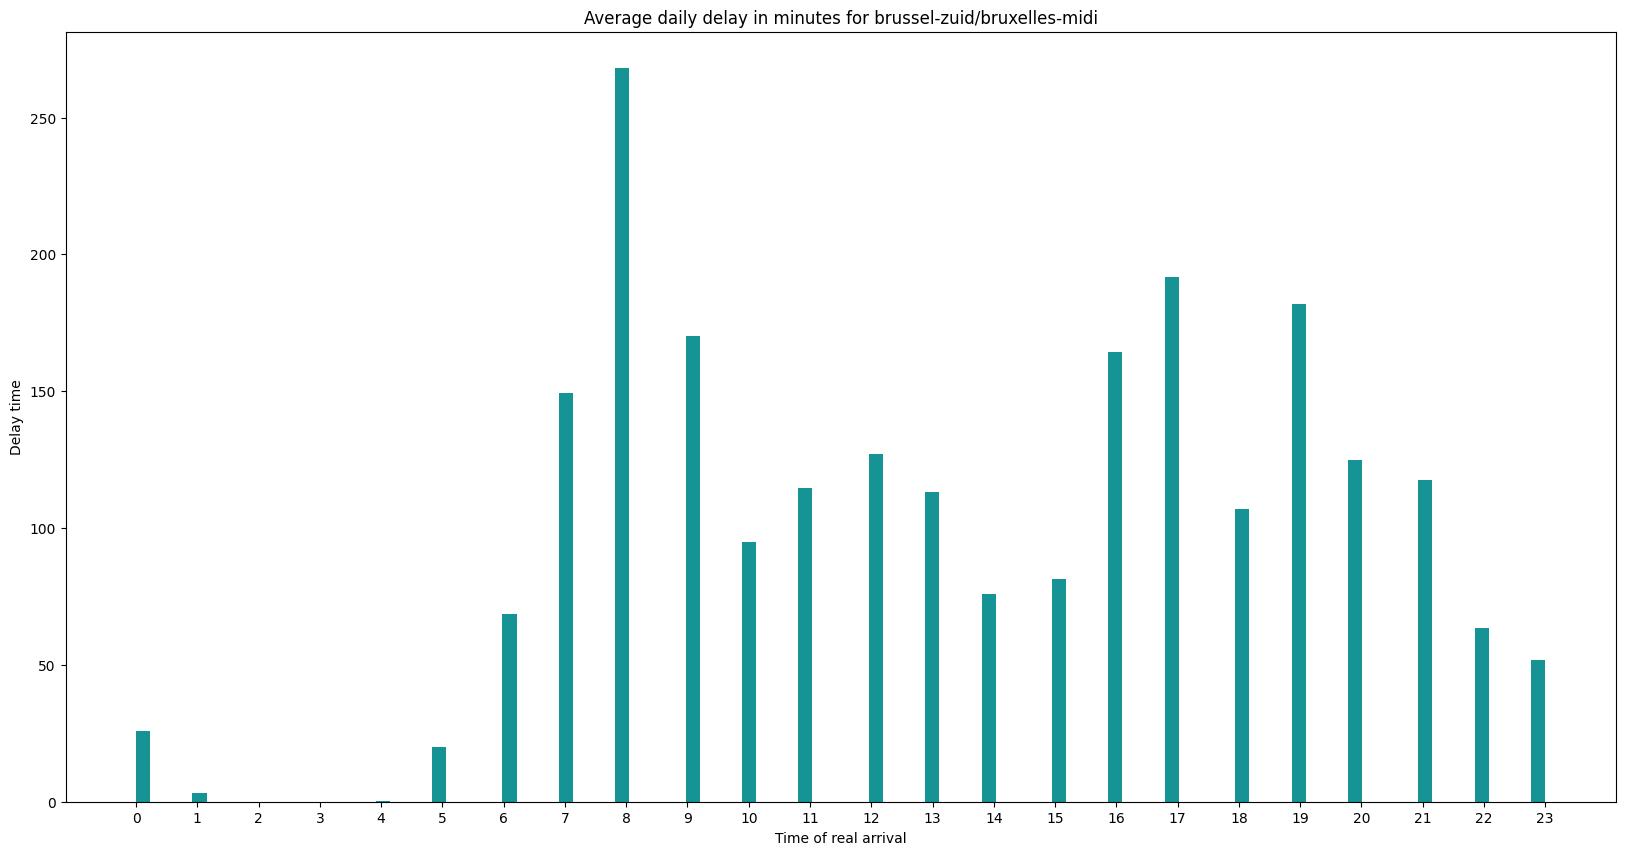

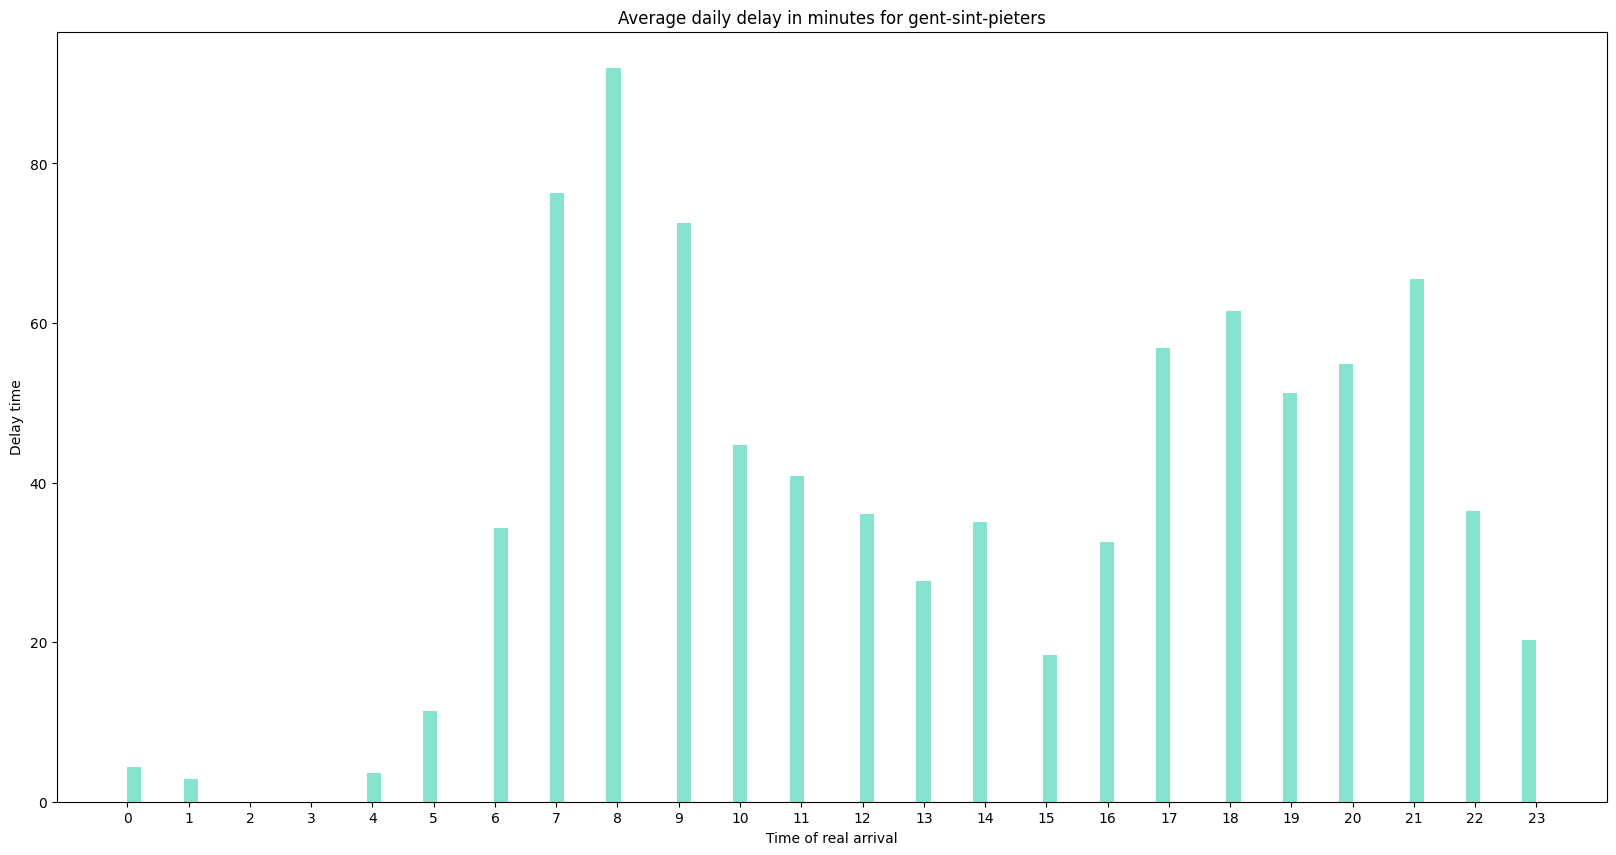

In [10]:
for station in trips["Name of the stop"].unique():
    color = np.random.rand(3,)
    plt.figure(figsize=(20,10))
    plt.title("Average daily delay in minutes for "+station)
    plt.xlabel("Time of real arrival")
    plt.ylabel("Delay time")
    plt.xticks(np.arange(0, 24, 1))
    plt.hist(x= trips[(trips["Name of the stop"] == station)]["Time of real arrival"].dt.hour, weights = trips[(trips["Name of the stop"] == station) ]["Delay time"]/(7*60),  color=np.random.rand(3,), bins = 100)
    plt.show()